In [2]:
# plt.plot(arr[0], label='a')
# plt.figure()
# plt.plot(arr[1], label='b')
# plt.figure()
# plt.plot(arr2[0], label='c')
# plt.figure()
# plt.plot(arr2[1], label='d')

In [3]:
data = []
for i in range(6):
    for j in range(9): 
        filename = 'data/rf-lab/nine_movs_six_sub_split/' + str(i + 1) + '_' + str(j + 1) + '.txt'
        x = np.load(filename, allow_pickle=True)
        x = np.array(x)
        for line in x:
            line = np.insert(line,0,[i, j])
            data.append(line)
        
df = pd.DataFrame(data)
df = df.rename(columns={0: "subject", 1: "move"})
# display(df[df['move'] == 7])


In [4]:
from scipy.stats.stats import pearsonr

# print(pearsonr(arr[0],arr[1]))
# print(pearsonr(arr[0],arr2[1]))

In [5]:
subject_one = df['subject'] == 1
move_one = df['move'] == 0
first_subject_data = df[subject_one & move_one]

subject_two = df['subject'] == 2
second_subject_data = df[subject_two & move_one]


data1 = first_subject_data.drop(columns=['subject','move']).sample(1).values
data2 = second_subject_data.drop(columns=['subject','move']).sample(1).values

# display(data1.shape)


/Users/antonvasilev/PyCharmProjects/emg-interface/emg-env/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


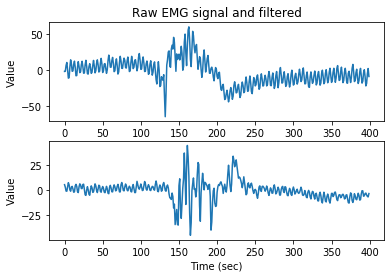

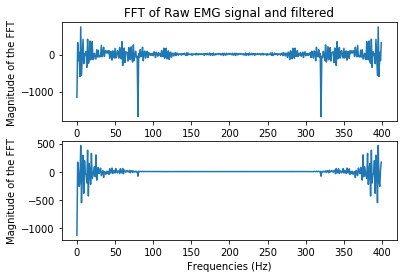

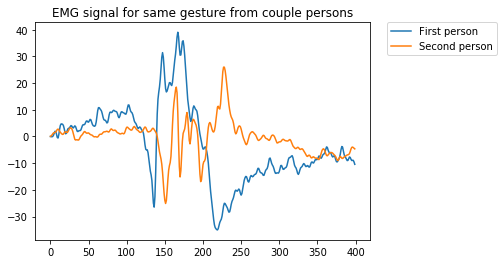

In [6]:
from scipy import signal
from scipy.fft import fft, ifft

def filter_signal(x):
    N = 10 
    Fc = 40
    Fs = 1600
    h = signal.firwin(numtaps=N, cutoff=40, nyq=Fs/2)
    y = signal.lfilter(h, 1.0, x)
    return y




plt.subplot(2, 1, 1)
plt.plot(data1[0], label='a')
plt.title('Raw EMG signal and filtered')
plt.ylabel('Value')

plt.subplot(2, 1, 2)
plt.plot(data2[0], label='b')
plt.ylabel('Value')
plt.xlabel('Time (sec)')

plt.figure()
filtered_signal_from_first_person = filter_signal(data1[0])
filtered_signal_from_second_person = filter_signal(data2[0])

# Fourier
y = fft(data1[0])
y2 = fft(filtered_signal_from_first_person)
plt.plot(y, label='noizy')
plt.plot(y2, label='filtered')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.subplot(2, 1, 1)
plt.plot(y)
plt.title('FFT of Raw EMG signal and filtered')
plt.ylabel('Magnitude of the FFT')

plt.subplot(2, 1, 2)
plt.plot(y2)
plt.xlabel('Frequencies (Hz)')
plt.ylabel('Magnitude of the FFT')
plt.show()


plt.figure()
plt.plot(filtered_signal_from_first_person, label='First person')
plt.plot(filtered_signal_from_second_person, label='Second person')
plt.title('EMG signal for same gesture from couple persons')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 16, 64)        1664      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 400)               2509200   
Total params: 2,529,328
Trainable params: 2,529,328
Non-trainable params: 0
_________________________________________________________________


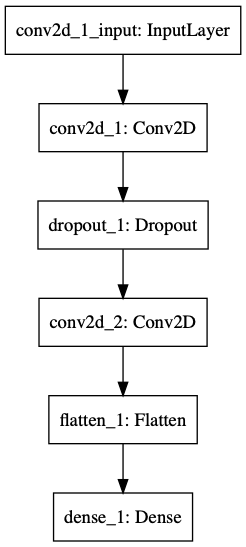

In [7]:
# Neural network model
!pip install pydot

from keras import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout
from keras.utils import plot_model


input_dim = 400
output_dim = 400

model = Sequential()
input_shape=(20,20,1,)
model.add(Conv2D(filters=64, kernel_size=(5,5), activation="relu", input_shape=input_shape))
model.add(Dropout(0.5))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu"))
model.add(Flatten())
model.add(Dense(400))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

model.summary()
plot_model(model, to_file='emg_filtering_model.png')

In [8]:
X = df.drop(columns=['subject','move']).values
y = df.drop(columns=['subject','move']).values

for i in range(len(y)):
    y[i] = filter_signal(y[i])

X2 = np.zeros((len(X), 20, 20, 1))
for i in range(len(X)):
    data = X[i]
    X2[i] = np.reshape(data, (20,20,1))

X = X2

In [9]:

print(X.shape)
print(y.shape)
model.fit(X, y, verbose=2, epochs=20, batch_size=64)

(2820, 20, 20, 1)
(2820, 400)
Epoch 1/20
 - 3s - loss: 359.3578 - accuracy: 0.0397
Epoch 2/20
 - 2s - loss: 101.6120 - accuracy: 0.1124
Epoch 3/20
 - 2s - loss: 63.2361 - accuracy: 0.1713
Epoch 4/20
 - 2s - loss: 44.9504 - accuracy: 0.2291
Epoch 5/20
 - 2s - loss: 40.2644 - accuracy: 0.2911
Epoch 6/20
 - 3s - loss: 30.3650 - accuracy: 0.3199
Epoch 7/20
 - 2s - loss: 24.4486 - accuracy: 0.3613
Epoch 8/20
 - 2s - loss: 21.4973 - accuracy: 0.3798
Epoch 9/20
 - 3s - loss: 20.0063 - accuracy: 0.4043
Epoch 10/20
 - 3s - loss: 20.2102 - accuracy: 0.4096
Epoch 11/20
 - 4s - loss: 17.4776 - accuracy: 0.4259
Epoch 12/20
 - 5s - loss: 16.1602 - accuracy: 0.4390
Epoch 13/20
 - 5s - loss: 18.2276 - accuracy: 0.4394
Epoch 14/20
 - 4s - loss: 15.9126 - accuracy: 0.4553
Epoch 15/20
 - 3s - loss: 15.2397 - accuracy: 0.4631
Epoch 16/20
 - 3s - loss: 14.5716 - accuracy: 0.4784
Epoch 17/20
 - 3s - loss: 13.3300 - accuracy: 0.4855
Epoch 18/20
 - 3s - loss: 15.0222 - accuracy: 0.4759
Epoch 19/20
 - 3s - los

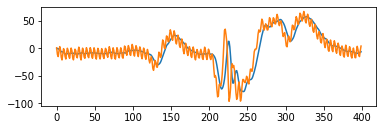

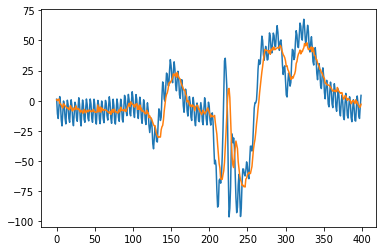

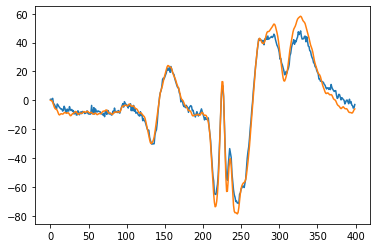

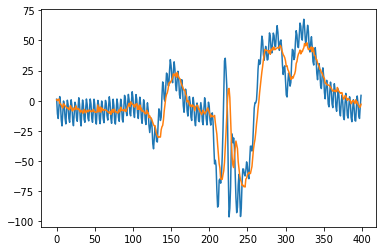

In [10]:

predicted = model.predict([[X[0]]])[0]
# print(predicted)

plt.subplot(2,1,1)
plt.plot(y[0])
plt.plot(X[0].reshape(400))

plt.figure()
plt.plot(X[0].reshape(400))
plt.plot(predicted)

plt.figure()
plt.plot(predicted)
plt.plot(y[0])

plt.figure()
plt.plot(X[0].reshape(400))
plt.plot(predicted)

# Статистика по сигналу
## Дисперсия между одним жестом и разными субъектами

IndexError: index 276 is out of bounds for axis 0 with size 276

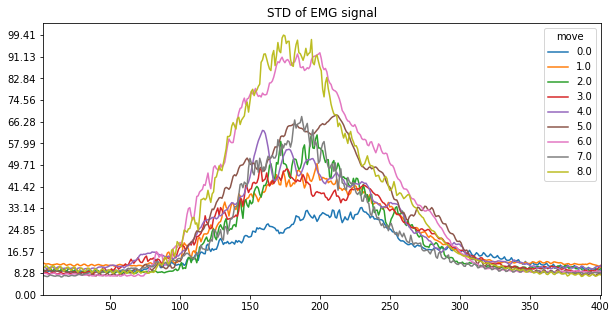

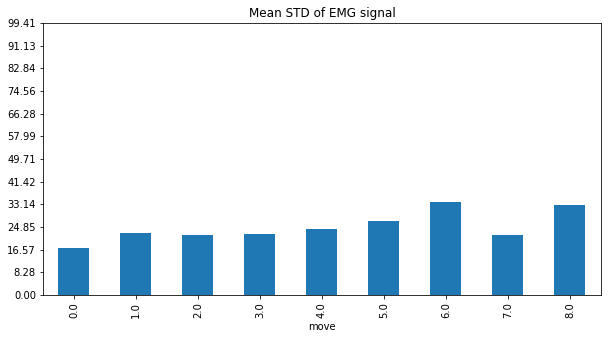

In [11]:
# display(df)
def plot_std_for_move(df, move_index):
    first_move = df[df['move'] == move_index]
    std_sum = first_move.describe()
    std_sum = std_sum.loc['std']
    std_sum = std_sum.T.drop(['move','subject'])
    std_sum = pd.DataFrame(std_sum)
    std_sum.plot(yticks=np.linspace(0,std_sum.max(),13), title=('Move of ' + str(i)))
    
group = df.drop(['subject'], axis=1).groupby(['move']).std()
# group = group.drop('subject')
group = group.T
group.plot(yticks=np.linspace(0,group.max().max(),13), title='STD of EMG signal', figsize=(10,5))

plt.figure()
group_mean = group.mean()
# display(group_mean)
group_mean.plot(kind='bar', yticks=np.linspace(0,group.max().max(),13), title='Mean STD of EMG signal', figsize=(10,5))

# for i in range(9):
#     plot_std_for_move(df, i)

pieces = df[df['move'] == 0].drop(columns=['subject','move']).values

for i in range(len(y)):
    pieces[i] = filter_signal(pieces[i])
filtered = pd.DataFrame(pieces)

filtered_group = pd.DataFrame(filtered.std())

unfiltered = pd.DataFrame(group[0])
unfiltered = unfiltered.reset_index(drop=True)
filtered_group = filtered_group.reset_index(drop=True)
# display(unfiltered.reset_index(drop=True))
# display(filtered_group)
final_group = pd.concat([unfiltered.T, filtered_group.T], keys=['raw', 'filtered'], ignore_index=True)
final_group = final_group.T
final_group.columns=['raw','filtered']
# display(final_group)
# display(group[[0]])
# display(filtered_group)
final_group.plot(title='Standard deviation of EMG signal for one type of hand move (raw/filtered)', figsize=(10,5))

## Дисперсия между разными жестами для одного субъекта

In [ ]:
first_person_data = df # df[df['subject'] == 0]
group = first_person_data.drop(['move'], axis=1).groupby(['subject']).std()
# group = group.drop('subject')
group = group.T
display(group)
group.plot()

# Построения набора данных для нейросетевой фильтрации

In [ ]:
display(df)

# Фильтруем все данные
pieces = df.drop(columns=['subject','move']).values

for i in range(len(pieces)):
    pieces[i] = filter_signal(pieces[i])

filtered_df = pd.DataFrame(pieces)
filtered_df['subject'] = df['subject']
filtered_df['move'] = df['move']

display(filtered_df)

train_mask = filtered_df['subject'] < 4
train_df = filtered_df[train_mask]
test_df = filtered_df[~train_mask]

In [ ]:
# Формируем X
# Формируем целевой вектор правильных ответов Y

# test_df = test_df.sample(frac=1)
size = test_df.count()[0]
X = []
y = []
for i in range(size):
    data = test_df.iloc[i]
    data_values = data.drop(['move', 'subject'])
    
    mask = (test_df['move'] == data.move)
    data_target = test_df[mask].sample(1)
    data_target = data_target.drop(['move', 'subject'], axis=1)
    X.append(data_values.values)
    y.append(data_target.values[0])
    
X = np.array(X)
y = np.array(y)
# Визуализация
plt.plot(X[0], label='x')
plt.plot(y[0], label='y')
plt.legend()

## Обучение

In [ ]:
from keras.callbacks import EarlyStopping

X2 = np.zeros((len(X), 20, 20, 1))
for i in range(len(X)):
    data = X[i]
    X2[i] = np.reshape(data, (20,20,1))

X = X2

callback = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True, verbose=2)
history = model.fit(X, y, verbose=2, epochs=200, batch_size=64, callbacks=[callback])

In [ ]:
plt.plot(history.history['loss'])

example_index = 10
predicted = model.predict([[X[example_index]]])[0]
# print(predicted)

plt.subplot(2,1,1)
plt.plot(y[example_index], label='y')
plt.plot(X[example_index].reshape(400), label='x')
plt.legend()

plt.figure()
plt.plot(X[example_index].reshape(400), label='x')
plt.plot(predicted, label='predicted')
plt.legend()

plt.figure()
plt.plot(predicted, label='predicted')
plt.plot(y[example_index], label='y')
plt.legend()

plt.figure()
plt.plot(X[example_index].reshape(400), label='Input data')
plt.plot(predicted, label='Predicted')
plt.title('Input signal and result of neurofiltration')
plt.legend()

## Оценка. Подсчет статистики

In [ ]:
group = df.drop(['subject'], axis=1).groupby(['move']).std()
# group = group.drop('subject')
group = group.T
group.plot(yticks=np.linspace(0,group.max().max(),13), title='STD of EMG signal', figsize=(10,5))

pieces = df[df['move'] == 0].drop(columns=['subject','move']).values

for i in range(len(pieces)):
    filtered_data = filter_signal(pieces[i])
    pieces[i] = model.predict(np.array([filtered_data.reshape(20,20,1)]))
filtered = pd.DataFrame(pieces)

filtered_group = pd.DataFrame(filtered.std())

unfiltered = pd.DataFrame(group[0])
unfiltered = unfiltered.reset_index(drop=True)
filtered_group = filtered_group.reset_index(drop=True)

final_group = pd.concat([unfiltered.T, filtered_group.T], keys=['raw', 'filtered'], ignore_index=True)
final_group = final_group.T
final_group.columns=['raw','filtered']
final_group.plot(title='Standard deviation of EMG signal for one type of hand move (raw/filtered)', figsize=(10,5))

In [ ]:
# Просто пример вывода
def plot_difference(group, group_filter):
    group_mean = group.mean()
    group_filter_mean = group_filter.mean()
    final_group = pd.concat([group_mean, group_filter_mean, group_mean - group_filter_mean], axis=1)
    final_group.columns = ['Raw', 'filtered', 'difference']

    display(final_group)
    final_group.plot(kind='bar', yticks=np.linspace(0,group.max().max(),13), title='Mean STD of EMG signal', figsize=(10,5))
    group_mean = final_group.mean()
    display(group_mean.difference / group_mean.Raw)

    
raw_data = df.drop(['subject'], axis=1).groupby(['move'])

filtered_data = df.drop(['subject'], axis=1)
filtered_values = filtered_data.drop(['move'], axis=1).values
# display(filtered_values)
filtered_values_new = np.zeros((len(filtered_values), 20, 20, 1))
for i in range(len(filtered_values)):
    filtered_values_new[i] = np.reshape(filtered_values[i], (20,20,1))
filtered_values = model.predict(filtered_values_new)
# display(filtered_values)

filtered_data = pd.DataFrame(filtered_values)
filtered_data['move'] = df['move']
# filtered_data.groupby(['move']).mean().T[0].plot()
# filtered_data.groupby(['move']).mean().T[7].plot()

filtered_data = filtered_data.groupby(['move'])
raw_group = raw_data.std()
raw_group = raw_group.T

filtered_group = filtered_data.std()
filtered_group = filtered_group.T


plot_difference(raw_group, filtered_group)


In [ ]:
# Сравниваем конкретные сигналы до и после фильтрации
example_index = 10
plt.figure()
plt.plot(X[example_index].reshape(400), label='Input data')
plt.plot(predicted, label='Predicted')
plt.title('Input signal and result of neurofiltration')
plt.legend()

In [ ]:
# Для разных жестов одного субъекта
fig, axes = plt.subplots(2, 1, figsize=(10,8))

# Raw data
first_person_data = df # df[df['subject'] == 0]
group = first_person_data.drop(['move'], axis=1).groupby(['subject']).std()
# group = group.drop('subject')
group = group.T
display(group)
group.plot(ax=axes[0], yticks=np.linspace(0,100,10), title='Std between various move types. Before filtering')

# Filtered data
filtered_data = pd.DataFrame(filtered_values)
filtered_data['move'] = df['move']
filtered_data['subject'] = df['subject']
first_person_data = filtered_data # df[df['subject'] == 0]
group = first_person_data.drop(['move'], axis=1).groupby(['subject']).std()
# group = group.drop('subject')
group = group.T
display(group)
group.plot(ax=axes[1], title='After filtering', yticks=np.linspace(0,100,10), legend=False)

In [ ]:
model.save('model_14_07_21.h5')